In [1]:
import osmnx as ox
import pandas as pd
import geopandas as gdp

from sklearn.cluster import SpectralClustering
import numpy as np
import networkx as nx
import os
import sys
import pickle

from shapely.geometry import Polygon, MultiPolygon
from descartes import PolygonPatch

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib import ticker
from matplotlib import cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors



In [2]:
ROOT_DIR = "/home/charles/Projects/QcMtlStreets"

In [3]:
sys.path.append(os.path.join(ROOT_DIR, "Python"))   
sys.path.append("/home/charles/Projects/alluvial_diagram")   
from OsmnxElev import *

NameError: name 'dfEdgesAll' is not defined

In [ ]:
#Get the shp file 
shpQcCity = gpd.read_file(os.path.join(ROOT_DIR, "Data","GeoData","Neighbourhoods","vdq-quartier.shp"))

In [5]:
#graph=loadGraphElevGradesNeighQc()

In [ ]:
plotNodeDegreesQc()

In [6]:
#[dat for u,v, dat in graph.edges(data=True)]

In [7]:
    listColMapsNames=["Set1","Set2","Set3","Dark2"]
    
    listColMaps=[  plt.cm.get_cmap(n) for n  in listColMapsNames ]

In [8]:

listColMapsNames=["Set1","Set2","Set3","Dark2"]
    
listColMaps=[  plt.cm.get_cmap(n) for n  in listColMapsNames ]
 
listAllColors=[]
for k in range(len(listColMaps)):
        try:
            listAllColors +=  [listColMaps[k](i) for i in range(listColMaps[k].N)]  
        except Exception as e:
            raise("Fatal error in get36DivergingColors color map idx ", k , " col map size: ", listColMaps[k].N, " -- ", str(e))

In [9]:
listAllColors

[(0.8941176470588236, 0.10196078431372549, 0.10980392156862745, 1.0),
 (0.21568627450980393, 0.49411764705882355, 0.7215686274509804, 1.0),
 (0.30196078431372547, 0.6862745098039216, 0.2901960784313726, 1.0),
 (0.596078431372549, 0.3058823529411765, 0.6392156862745098, 1.0),
 (1.0, 0.4980392156862745, 0.0, 1.0),
 (1.0, 1.0, 0.2, 1.0),
 (0.6509803921568628, 0.33725490196078434, 0.1568627450980392, 1.0),
 (0.9686274509803922, 0.5058823529411764, 0.7490196078431373, 1.0),
 (0.6, 0.6, 0.6, 1.0),
 (0.4, 0.7607843137254902, 0.6470588235294118, 1.0),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411, 1.0),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235, 1.0),
 (1.0, 0.8509803921568627, 0.1843137254901961, 1.0),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451, 1.0),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137

File exists => reading graph
There are  0.01073414228318656  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste
Using absolute grades


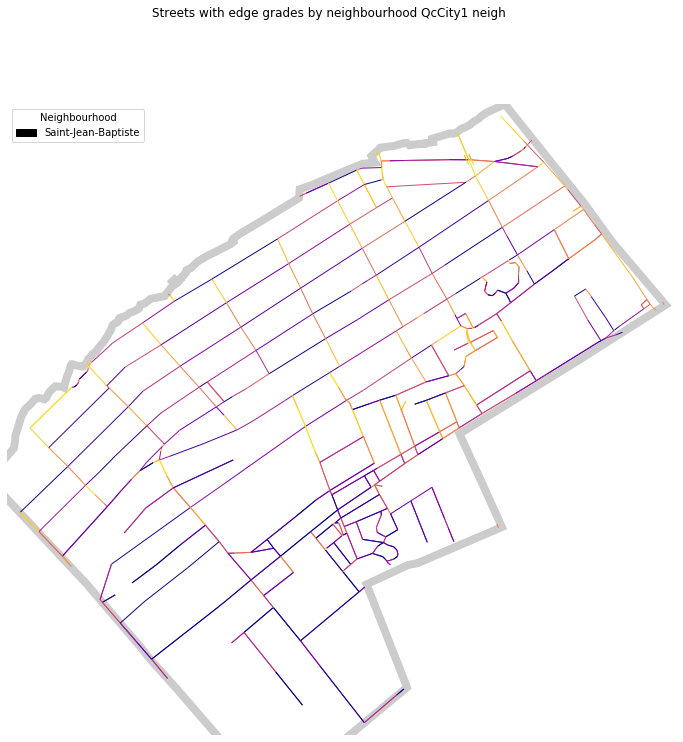

In [7]:
fig,ax=plotGraphGradeNeighQc(listNeigh=["Saint-Jean-Baptiste"],legPosParam="upper left")

#All this legend bull always fails
#leg=ax.get_legend()
#leg.set_label("upper left")
#leg(loc='upper left',bbox_to_anchor=(-0.5, 1))

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


File exists => reading graph
There are  0.17462765309849437  of points in the bounding box in neighbourhoods Saint-Jean-Baptiste, Saint-Roch, Vieux-Québec/Cap-Blanc/Colline parlementaire, Montcalm, Saint-Sauveur
Using absolute grades


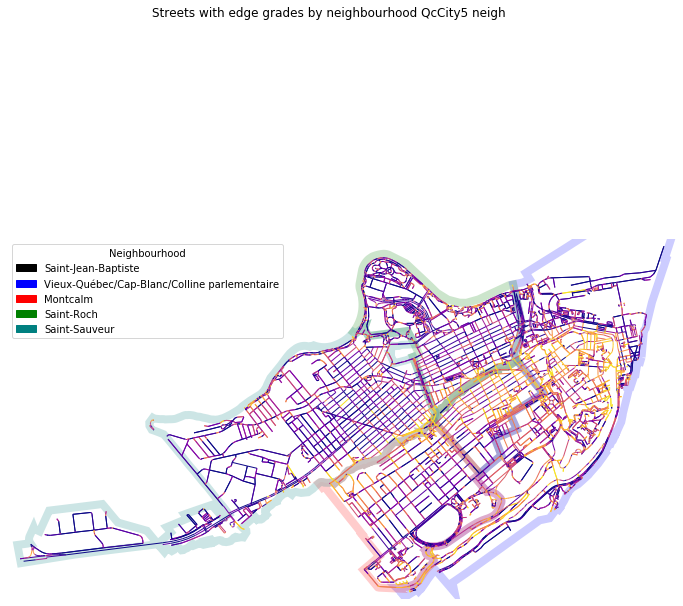

In [8]:
 
fig,ax=plotGraphGradeNeighQc( legPosParam="upper left")


In [35]:
ax.get_legend

matplotlib.axes._subplots.AxesSubplot

In [9]:
colMapSet2=plt.cm.get_cmap("Set2")
colMapSet2.N

8

In [10]:
colMapSet3=plt.cm.get_cmap("Set3")
colMapSet3.N

12

In [11]:
colMapDark2=plt.cm.get_cmap("Dark2")
colMapDark2.N

8

In [12]:
colMapSet1=plt.cm.get_cmap("Set2")

print(colMapSet1.N, colMapSet1(1), colMapSet1(2))

8 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961, 1.0) (0.5529411764705883, 0.6274509803921569, 0.796078431372549, 1.0)


In [13]:
listAllColors=[colMapSet1(i) for i in range(colMapSet1.N)]+ \
[colMapSet3(i) for i in range(colMapSet3.N)]+ \
[colMapSet2(i) for i in range(colMapSet2.N)]+ \
[colMapDark2(i) for i in range(colMapDark2.N)]

len(listAllColors)

36

In [12]:
    #Get diverging color palette
    listAllColors=get36DivergingColors()
    
    dictCol={}
    for k,row in shpQcCity.iterrows():
        dictCol[row["NOM"]] = listAllColors[k] 
    
    #Hard code the central neigh for compatibility
    dictCol["Vieux-Québec/Cap-Blanc/Colline parlementaire"] = "blue"
    dictCol["Saint-Jean-Baptiste"] = "black"
    dictCol["Saint-Roch"] = "green"
    dictCol["Saint-Sauveur"] = "teal"
    dictCol["Montcalm"] = "red"

In [13]:
#dictCol

In [14]:
colNeigh=[listAllColors[i] for i in range(shpQcCity.shape[0])]

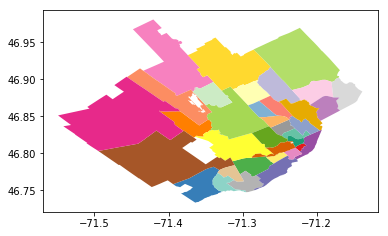

In [15]:
shpQcCity.geometry.plot(color=colNeigh)

In [16]:
colsDefaultQc=getDefaultDictColQc()
dfColsQc=pd.DataFrame.from_dict(colsDefaultQc,orient="index").reset_index()

In [17]:
dfColsQc.rename(columns={"index":"NOM",0:"col"},inplace=True)
dfColsQc

NOM  \
0                            Saint-Jean-Baptiste   
1                                      Cap-Rouge   
2                             Cité Universitaire   
3   Vieux-Québec/Cap-Blanc/Colline parlementaire   
4                                    Des Châtels   
5                            Duberger-Les Saules   
6                                     L'Aéroport   
7                              Lac-Saint-Charles   
8                                         Lairet   
9                                 Vieux-Limoilou   
10                                  Loretteville   
11                                     Maizerets   
12                                      Montcalm   
13                    Neufchâtel-Est/Lebourgneuf   
14                    Notre-Dame-des-Laurentides   
15                                       Plateau   
16                                   Saint-Louis   
17                          Pointe-de-Sainte-Foy   
18                                  Quartier 4-2   
19                                  Quartier 4-3   
20                                      Jésuites   
21                                  Quartier 4-5   
22                                  Quartier 4-6   
23                                  Quartier 5-1   
24                                  Quartier 5-2   
25                            Chutes-Montmorency   
26                                  Quartier 5-4   
27                                   Saint-Émile   
28                               Saint-Sacrement   
29                                    Saint-Roch   
30                                 Saint-Sauveur   
31                                       Sillery   
32                                    Val-Bélair   
33                                        Vanier   
34                                  Vieux-Moulin   

                                                  col  
0                                               black  
1   (0.21568627450980393, 0.49411764705882355, 0.7...  
2   (0.30196078431372547, 0.6862745098039216, 0.29...  
3                                                blue  
4                 (1.0, 0.4980392156862745, 0.0, 1.0)  
5                                (1.0, 1.0, 0.2, 1.0)  
6   (0.6509803921568628, 0.33725490196078434, 0.15...  
7   (0.9686274509803922, 0.5058823529411764, 0.749...  
8                                (0.6, 0.6, 0.6, 1.0)  
9   (0.4, 0.7607843137254902, 0.6470588235294118, ...  
10  (0.9882352941176471, 0.5529411764705883, 0.384...  
11  (0.5529411764705883, 0.6274509803921569, 0.796...  
12                                                red  
13  (0.6509803921568628, 0.8470588235294118, 0.329...  
14  (1.0, 0.8509803921568627, 0.1843137254901961, ...  
15  (0.8980392156862745, 0.7686274509803922, 0.580...  
16  (0.7019607843137254, 0.7019607843137254, 0.701...  
17  (0.5529411764705883, 0.8274509803921568, 0.780...  
18                (1.0, 1.0, 0.7019607843137254, 1.0)  
19  (0.7450980392156863, 0.7294117647058823, 0.854...  
20  (0.984313725490196, 0.5019607843137255, 0.4470...  
21  (0.5019607843137255, 0.6941176470588235, 0.827...  
22  (0.9921568627450981, 0.7058823529411765, 0.384...  
23  (0.7019607843137254, 0.8705882352941177, 0.411...  
24  (0.9882352941176471, 0.803921568627451, 0.8980...  
25  (0.8509803921568627, 0.8509803921568627, 0.850...  
26  (0.7372549019607844, 0.5019607843137255, 0.741...  
27  (0.8, 0.9215686274509803, 0.7725490196078432, ...  
28  (1.0, 0.9294117647058824, 0.43529411764705883,...  
29                                              green  
30                                               teal  
31  (0.4588235294117647, 0.4392156862745098, 0.701...  
32  (0.9058823529411765, 0.1607843137254902, 0.541...  
33  (0.4, 0.6509803921568628, 0.11764705882352941,...  
34  (0.9019607843137255, 0.6705882352941176, 0.007...

In [18]:
shpQcCity.columns

Index(['ID', 'NOM', 'SUPERFICIE', 'PERIMETRE', 'geometry'], dtype='object')

In [19]:
np.isin( ["NOM","ID"], shpQcCity.columns)

array([ True,  True])

In [20]:

shpQcCity=pd.merge( shpQcCity, dfColsQc,
          how="left",
         on="NOM")

In [21]:
shpQcCity.head()

ID                                           NOM   SUPERFICIE  PERIMETRE  \
0   1                           Saint-Jean-Baptiste    678906.19    3781.17   
1   2                                     Cap-Rouge  12719875.43   19209.44   
2   3                            Cité Universitaire   7965511.15   12307.99   
3   4  Vieux-Québec/Cap-Blanc/Colline parlementaire   4293772.29   13796.73   
4   5                                   Des Châtels   9361555.58   16866.97   

                                            geometry  \
0  POLYGON Z ((-71.21631942283598 46.812638240404...   
1  POLYGON Z ((-71.3937234763554 46.7584717847306...   
2  POLYGON Z ((-71.26750940561126 46.794866190810...   
3  POLYGON Z ((-71.20001449142366 46.813926919298...   
4  POLYGON Z ((-71.40300481113596 46.856427042165...   

                                                 col  
0                                              black  
1  (0.21568627450980393, 0.49411764705882355, 0.7...  
2  (0.30196078431372547, 0.6862745098039216, 0.29...  
3                                               blue  
4                (1.0, 0.4980392156862745, 0.0, 1.0)

In [22]:
np.isnan(shpQcCity.col[2])

array([False, False, False, False])

In [23]:
#shpQcCity["col"] = [ "grey" for c in shpQcCity["col"] if np.isnan(c) else ]

In [24]:
shpQcCity["col"]=shpQcCity["col"].fillna("grey")

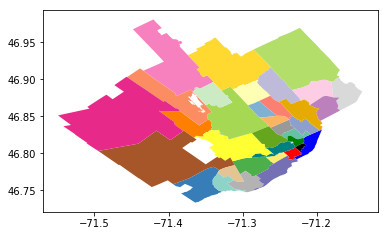

In [25]:
shpQcCity.geometry.plot(color=shpQcCity["col"])

In [6]:
shpQc=getShpQcWithCol()

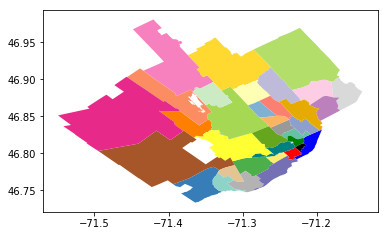

In [9]:
shpQc.geometry.plot(color=shpQc["col"])